<a href="https://colab.research.google.com/github/Mina-Martinovic/PPPO/blob/main/PPPO_Mina_Martinovi%C4%87_IT14_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predmet: Principi prezentacije i prepoznavanja oblika

Student: Mina Martinović

Broj indeksa: IT14/2020

Projektni zadatak: Mammals Classification

***UVOD***

Mašinsko učenje je grana veštačke inteligencije koja se bavi razvojem algoritama i tehnika koje omogućavaju računarima da automatski uče iz podataka, bez eksplicitnog programiranja. Ovi algoritmi koriste statističke modele i matematičke metode kako bi identifikovali obrasce i zakonitosti u podacima, kako bi mogli da donose predikcije, donose odluke ili obavljaju zadatke bez ljudske intervencije. Mašinsko učenje se koristi u različitim oblastima, kao što su prepoznavanje slika, obrada prirodnog jezika, preporučivanje proizvoda, autonomna vožnja i mnoge druge.[1]

Postoji 5 tipova mašinskog učenja, a to su:

1) Nadgledano učenje: Ovde se koriste označeni podaci, gde se model trenira na ulaznim podacima i odgovarajućim izlaznim vrednostima. Cilj je da model nauči mapiranje između ulaza i izlaza kako bi mogao da donosi predikcije na novim, neviđenim podacima.[1]

2) Nesnadgledano učenje: Ovde se koriste neoznačeni podaci, gde model treba da pronađe obrasce i strukture u podacima bez prethodno poznatih izlaza. Ova tehnika se često koristi za grupisanje podataka, smanjenje dimenzionalnosti ili generisanje novih reprezentacija podataka.[1]

3) Pojačano učenje: Ova tehnika se koristi za obuku modela da donosi odluke na osnovu interakcije sa okruženjem. Model se nagrađuje ili kažnjava na osnovu svojih akcija, kako bi naučio optimalno ponašanje u datom okruženju.[1]

4) Polu-nadgledano učenje: Ova tehnika kombinuje elemente nadgledanog i nesnadgledanog učenja. Koristi se kada imamo ograničen broj označenih podataka, ali i veliku količinu neoznačenih podataka. Cilj je da se iskoristi neoznačeni podaci kako bi se poboljšala tačnost modela.[1]



**Klasifikacija** je jedan od osnovnih zadataka u mašinskom učenju. Ona se odnosi na proces dodeljivanja kategorija ili labela novim, neviđenim podacima na osnovu prethodno naučenog modela. Cilj klasifikacije je da se pronađe veza između ulaznih podataka i odgovarajuće kategorije ili klase. U klasifikaciji, model se trenira na skupu podataka koji sadrže ulazne podatke i odgovarajuće kategorije. Na osnovu tih podataka, model gradi funkciju koja može da predvidi kategoriju za nove, neviđene podatke. Kada se primeni na novi ulaz, model donosi odluku o tome kojoj kategoriji taj ulaz pripada.[2] [3]


***BIBLIOTEKE***

1) **TensorFlow** je popularna open-source biblioteka za mašinsko učenje koja je napisana u Pythonu. Ona pruža alate i resurse za izgradnju i treniranje različitih modela mašinskog učenja, kao što su neuronske mreže. TensorFlow je razvijen od strane Google Brain tima i koristi se širom sveta u industriji i akademskim krugovima.Biblioteka TensorFlow omogućava efikasno izvršavanje numeričkih operacija na velikim skupovima podataka, kao i automatsko diferenciranje za optimizaciju modela. Takođe pruža fleksibilnost u izgradnji i treniranju različitih arhitektura neuronskih mreža, kao što su konvolutivne neuronske mreže (CNN), rekurentne neuronske mreže (RNN) i generativne suparničke mreže (GAN). TensorFlow takođe ima bogatu ekosistem podrške, uključujući alate za vizualizaciju, optimizaciju, raspodelu i razmenu modela. Takođe podržava rad na različitim platformama, uključujući desktop računare, servere i mobilne uređaje.

2) **NumPy** je osnovni paket za naučno računarstvo u Python-u. To je Python biblioteka koja obezbjeđuje višedimenzionalni niz objekata, različite izvedene objekte (kao što su maskirani nizovi i matrice) i niz rutina za brze operacije na nizovima, uključujući matematičku, logičku, manipulaciju oblika, sortiranje, selekciju, I/O, diskretne Furijeove transformacije, osnovna linearna algebra, osnovne statističke operacije, simulacije nasumičnih brojeva i mnogo više.

3) **Matplotlib** je višeplatformska biblioteka za vizualizaciju podataka i grafičko crtanje (histogrami, raspoređeni grafikoni, stubičasti dijagrami, itd.) za Python i njegovo numeričko proširenje NumPy. Kao takva, ona predstavlja open-source alternativu za MATLAB. Programeri takođe mogu koristiti matplotlib-ove API-je (aplikacioni programerski interfejs) kako bi ugradili dijagrame u GUI aplikacije.

4) **Torch** je popularna biblioteka za mašinsko učenje i duboko učenje u programskom jeziku Python. Ona pruža širok spektar alata i funkcionalnosti za izgradnju, treniranje i evaluaciju neuronskih mreža. Torch je baziran na Lua programskom jeziku, ali postoji i Python verzija poznata kao PyTorch. PyTorch je open-source biblioteka koja omogućava efikasno korišćenje GPU-ova za ubrzanje izračunavanja. Ona pruža fleksibilnost i jednostavnost u korišćenju, što je čini popularnim izborom za istraživače i praktičare u oblasti mašinskog učenja. PyTorch podržava automatsko diferenciranje, što olakšava optimizaciju modela, kao i bogatu kolekciju algoritama za optimizaciju, funkcija gubitka i slojeva za izgradnju neuronskih mreža.[4]


***DATA SET***

Za realizaciju ovog projektnog zadatka korišten je, prethodno dati, data set koji se sastoji od foldera fotografija različitih vrsta sisara. Krajnji cilj je izvršiti njihovu klasifikaciju, odnosno odrediti kojoj grupi pripadaju.


# ***IMPORTOVANJE POTREBNIH BIBLIOTEKA***

Sledeći kod služi za importovanje različitih biblioteka za duboko učenje i obradu slika, kako bi se uopšte radilo s neuronskim mrežama, posebno koristeći PyTorch i TensorFlow. Pored toga, uključuje module za vizualizaciju pomoću Matplotlib-a i obradu slika pomoću PIL (Pillow)

In [ ]:
import torch
from torchvision import models, transforms
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
from PIL import Image, ImageDraw, ImageFont

***PRIPREMA PODATAKA***

Pre obučavanja našeg modela dubokog učenja, neophodno je prethodno obraditi podatke. Ovaj proces uključuje nekoliko ključnih koraka:

1) **Normalizacija**: Menjamo vrednosti piksela na slikama iz opsega od 0-255 do 0-1. Ova normalizacija pomaže u ubrzavanju procesa treninga i smanjenju šanse za preopterećenje. Vrši se uz pomoć *ImageDataGenerator* klase.

2) **Promena veličine slike**: Mi menjamo veličinu svih slika na ujednačenu veličinu od 256x256 piksela. Ova uniformnost je neophodna jer ulazni sloj naše neuronske mreže očekuje slike iste veličine.

3) **Podela podataka**: Skup podataka je podeljen na podskupove za obuku i validaciju. Koristimo 80% podataka za obuku i 20% za validaciju. Ovo razdvajanje pomaže u proceni performansi modela na nevidljivim podacima.

4) **Kategoričke oznake**: Pošto je ovo problem klasifikacije sa više klasa, postavili smo class_mode na *'categorical'*, što znači da će naše oznake biti jednokratno kodirane.

In [ ]:
def preprocess_data(data_dir, img_size=(256, 256), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

    return train_generator, validation_generator

***MODEL DUBOKOG UČENJA***

Ovaj korak podrazumeva definisanje same strukture modela, kao i kompajliranje.

In [ ]:
def build_model(base_model, num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

***UČITAVANJE DATOG SETA PODATAKA***

Sam set podataka se sastoji od 45 različitih foldera koji sadrže jednu ili više slika različitih vrsta sisara. Najpre je potrebno povezati Google Colab sa samim drajvom na kome se nalazi datase, kako bismo mogli izvršiti učitavanje podataka.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/mammals'
num_classes = 45
train_gen, val_gen = preprocess_data(data_dir, img_size=(256, 256), batch_size=32)

Found 11020 images belonging to 45 classes.
Found 2731 images belonging to 45 classes.


In [ ]:
print(data_dir)
print(len(data_dir))

/content/drive/MyDrive/mammals
30


***PRIKAZ UČITANIH PODATAKA***

Koristeći *plot_images*, proverićemo prikaz učitanih podataka. Biće prikazano prvih *7* fotografija iz *trening* dataset-a.

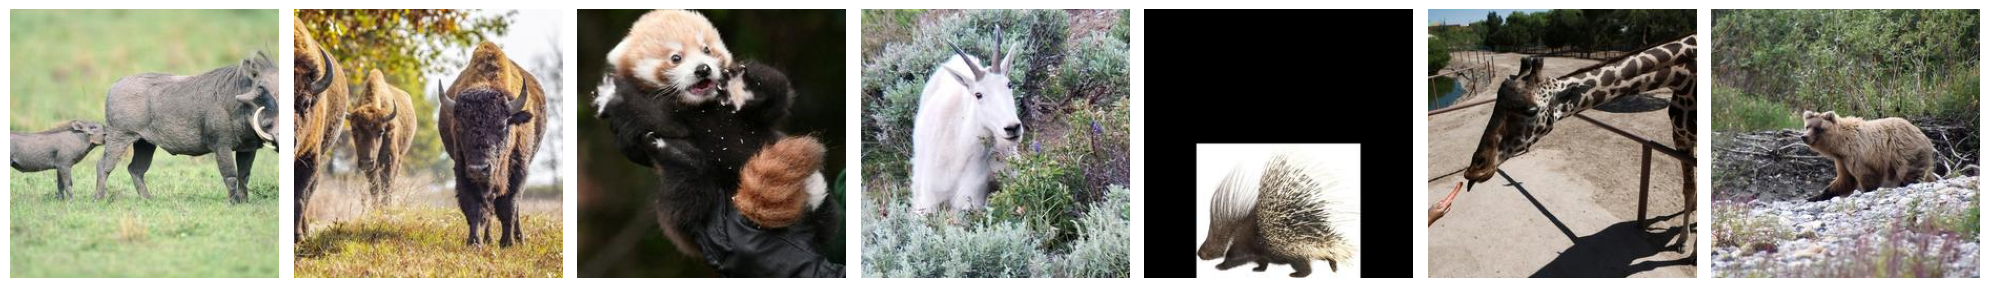

In [ ]:
def plot_images(images_arr, class_names):
    fig, axes = plt.subplots(1, 7, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_gen)
plot_images(sample_training_images[:7], class_names=train_gen.class_indices)

***DISTRIBUCIJA KLASA***

Ono što je ključni korak ove analize jeste određivanje i razumevanje distribucije klasa. Ukoliko nam je distribucija ravnomerna to bi značilo da nam model dobro funkcioniše, u suprotnom možemo imati dobre rezultate na jednim klasama, dokna drugim lošije.

**1)** **Računanje broja klasa:**
Prvo ćemo izračunati broj slika za svaku klasu pojedinačno u našem trening dataset-u. Ovde ćemo dobiti informaciju o tome koliko je naš skup podataka *uravnotežen*.

**2)** **Plot za distribuciju:**
Pravimo *bar* grafikon za vizuelan prikaz broja slika u svakoj klasi. Ovaj dijagram pomaže pri brzoj identifikaciji koliko je neka klasa zastupljena u nekom skupu podataka, da li je nedovoljno ili pak previše zastupljena.

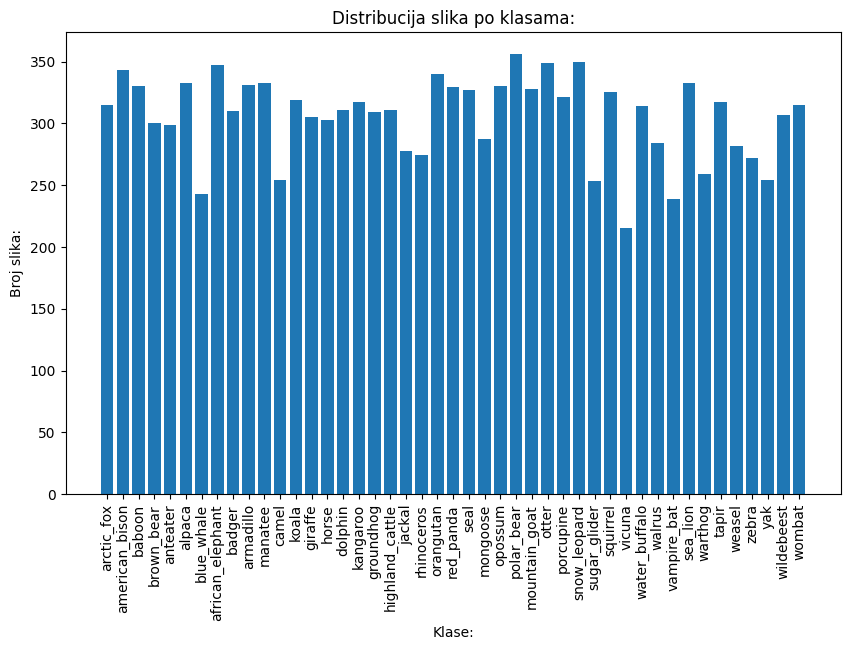

In [ ]:
import os
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/mammals'
class_names = os.listdir(data_dir)

number_of_pictures = [len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names]

plt.figure(figsize=(10, 6))
plt.bar(class_names, number_of_pictures)
plt.title('Distribucija slika po klasama:')
plt.xlabel('Klase:')
plt.ylabel('Broj slika:')
plt.xticks(rotation=90)
plt.show()


***KREIRANJE I TRENIRANJE MODELA MOBILENETV2***

**MobileNetV2 Model**

***Arhitektura modela:***

*MobileNetV2* koristi inovativne tehnike kako bi smanjio broj parametara i računskih operacija, čime je model pogodan za mobilne uređaje. Ključne komponente uključuju *Depthwise Separable Convolution* i *Inverted* *Residuals* blokove. Model je dizajniran za brzo izvršavanje na uređajima sa ograničenim resursima poput mobilinih telefona i uređaja za pametni dom (*Smart Home Devices*).

Model *MobileNetV2* je obično obučen na velikom skupu podataka,na primer, kao u ovom slučaju, *ImageNet* skupu slika.

***Modifikacije:***

*Include Top:* Parametar include_top postavljen je na False, što znači da izlazni sloj neće uključivati prethodno obučeni sloj za klasifikaciju, već ćete dodati svoj vlastiti izlazni sloj.

*Trainable:* Postavljanje trainable=False na osnovni model kako biste zadržali naučene karakteristike nepromenjene


In [ ]:

from tensorflow.keras.applications import MobileNetV2

def build_and_train_model_mobile(base_model, model_name, train_gen, val_gen, num_classes=45, epochs=2):
    # Postavljanje osnovnog modela
    base_model.trainable = False
    model = build_model(base_model, num_classes)

    # Povratni poziv za čuvanje najboljeg modela
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_accuracy', save_best_only=True)

    # Trening modela
    history = model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=[checkpoint])

    return model, history

# MobileNetV2
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model_mobilenet, history_mobilenet = build_and_train_model_mobile(base_model_mobilenet, 'mobilenet', train_gen, val_gen)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/2
345/345 [==============================] - 3417s 10s/step - loss: 0.6278 - accuracy: 0.8315 - val_loss: 0.4061 - val_accuracy: 0.8832
Epoch 2/2
345/345 [==============================] - 801s 2s/step - loss: 0.2109 - accuracy: 0.9348 - val_loss: 0.3687 - val_accuracy: 0.8909


***OCENE PRECIZNOSTI MODELA***

U prvom delu ocene preciznosti ćemo se fokusirati na konkretne vrednosti gubitka i preciznosti nakon što je model kreiran.

*model_mobilenet.evaluate(val_gen)* kako bi direktno izračunao gubitak i preciznost na validacionom skupu podataka nakon što je model treniran, dok *model_mobilenet.evaluate(test_gen)*, koristimo kako bi izračunale gunbitak i preciznost na test skupu podataka. Njega smo prethodno morali kreirati na osnovu naeg dataset-a, odnosno skupa fotografija.

Pored toga koristićemo i interfejs *plot_history_seaborn* uz pomoć kog ćemo, kroz vizualizaciju, omogućiti uvid u tok treninga i validacije kroz epohe. Pozivaćemo se na istoriju treninga našeg modela. Kreiraćemo *DataFrame* na osnovu naše istorije koji predstavlja strukturu podataka u biblioteci pod imenom *pandas*. Biblioteku moramo prethodno importovati.

In [ ]:
# Evaluacija modela na validacionom skupu tokom treninga
val_eval = model_mobilenet.evaluate(val_gen)

val_loss = val_eval[0]
val_accuracy = val_eval[1]

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")




86/86 [==============================] - 147s 2s/step - loss: 0.4464 - accuracy: 0.8704
Validation Loss: 0.4464
Validation Accuracy: 87.04%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/MyDrive/mammals'

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  #  ne mešati test podatke
)


Found 13751 images belonging to 45 classes.


In [ ]:
# Evaluacija modela na test skupu podataka
test_eval = model_mobilenet.evaluate(test_gen)

test_loss = test_eval[0]
test_accuracy = test_eval[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

430/430 [==============================] - 754s 2s/step - loss: 0.1965 - accuracy: 0.9349
Test Loss: 0.1965
Test Accuracy: 93.49%


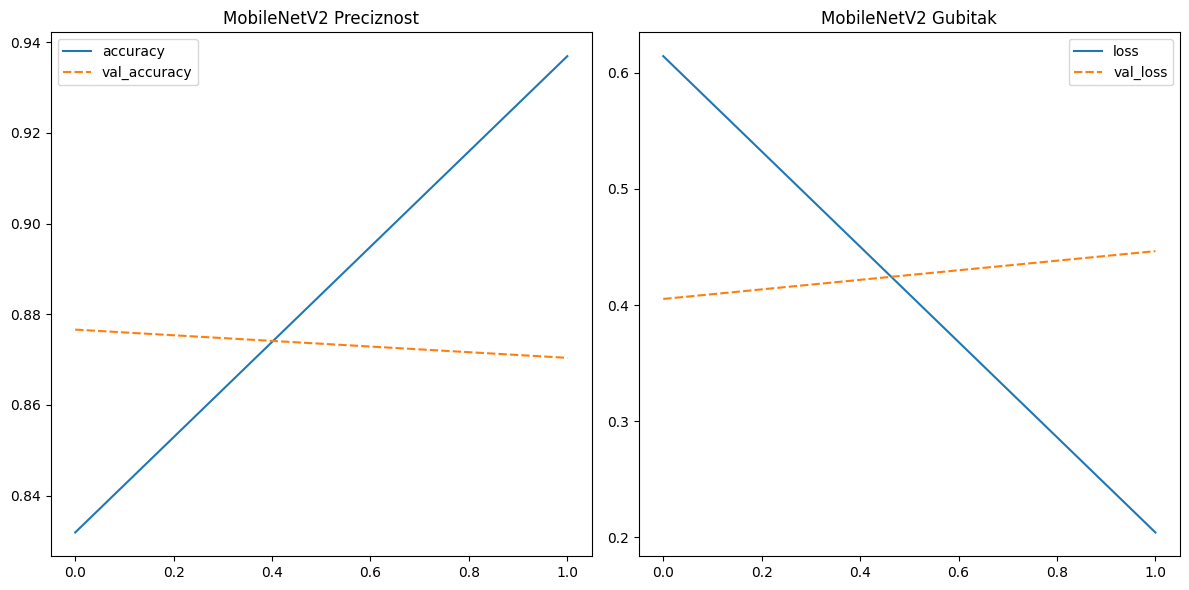

In [ ]:
import seaborn as sns
import pandas as pd


def plot_history_seaborn(history, title):
    # Kreiranje DataFrame-a iz istorije
    df = pd.DataFrame(history.history)

    # Prikazivanje grafika tačnosti
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.lineplot(data=df[['accuracy', 'val_accuracy']])
    plt.title(title + ' Preciznost')

    # Prikazivanje grafika gubitka
    plt.subplot(1, 2, 2)
    sns.lineplot(data=df[['loss', 'val_loss']])
    plt.title(title + ' Gubitak')

    plt.tight_layout()
    plt.show()

# Prikazivanje grafika za MobileNetV2 koristeći seaborn
plot_history_seaborn(history_mobilenet, 'MobileNetV2')


***`ZAKLJUČAK`***

Nakon celokupnog istraživanja i rada sa ovako velikim skupom podataka, može se reći da je bilo veoma zahtevno, ali i interesantno. Kako je model istreniran u "samo" dve epohe, zbog tehničkih razloga, tako i sam grafik ocene preciznosti, na prvi pogled, ne izgleda preterano zanimljivo, kako prosto nema više etapa, ali to bi svakako mogao biti izazov za neko sledeće istraživanje. Model *MobileNetV2* se, možemo reći, pokazao kao efikasan, kako nam je stopa preciznosti, odnosno accuracy nekolika puta (nakon nekoliko dodatnih pokretanja) prešla *0,9* vrednost, te možemo zaključiti da je klasifikacija uspešno odrađena.




***LITERATURA***

[1] https://www.geeksforgeeks.org/types-of-machine-learning/

[2] https://medium.com/mlearning-ai/image-classification-for-beginner-a6de7a69bc78#:~:text=Image%20Classification%20for%20beginner%201%20Step%201%3A%20Reading,...%206%20Step%206%3A%20Model%20evaluation%201.%20

[3] https://www.tensorflow.org/tutorials/images/classification

[4] https://www.geeksforgeeks.org/introduction-to-tensorflow/